<a href="https://colab.research.google.com/github/MDA1422/BIDM_Tasks/blob/main/BIDM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


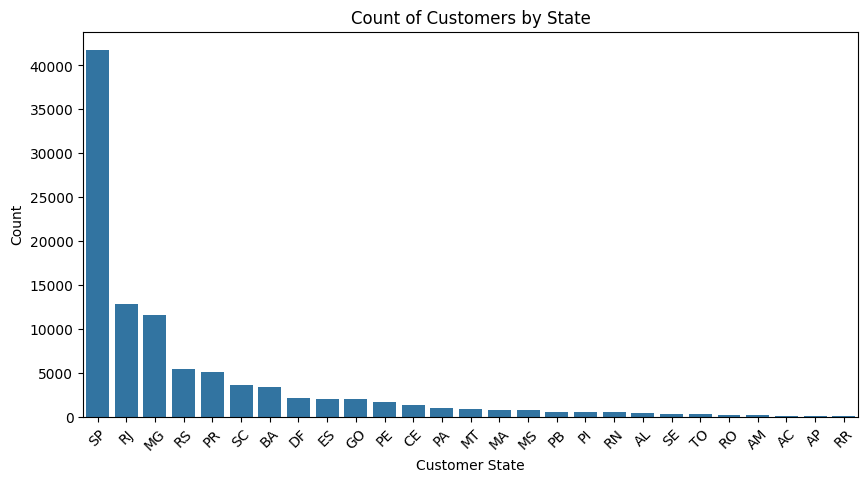

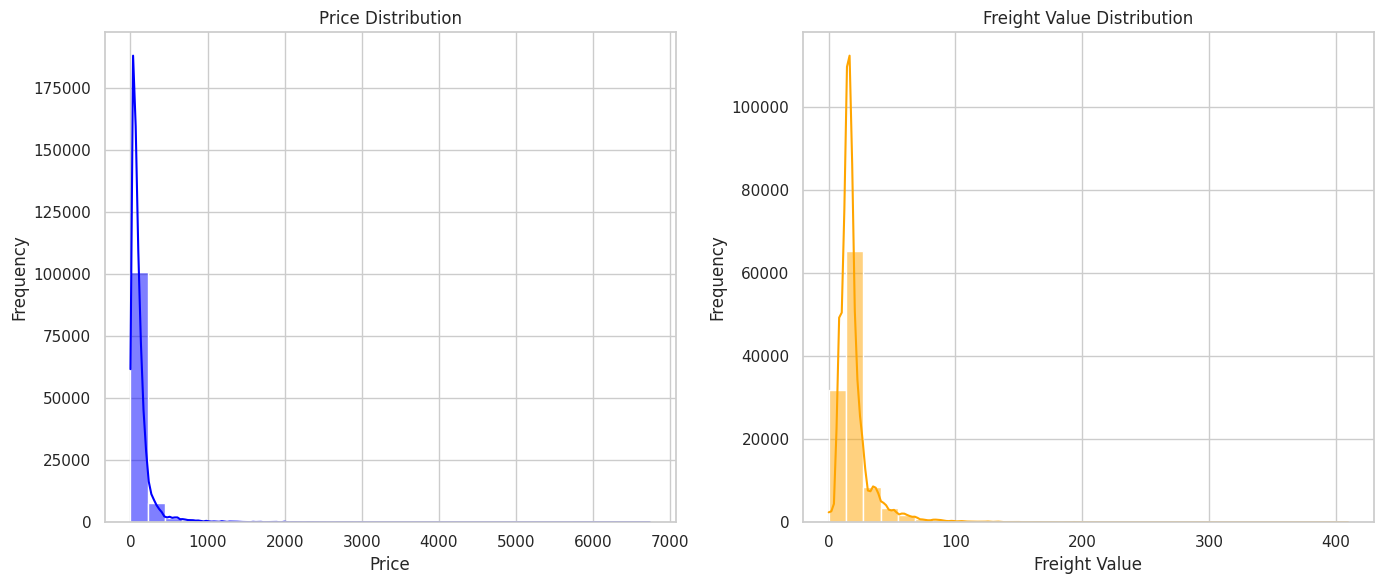

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

datasets_path = '/content/drive/MyDrive/olist_data'

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        # Plotting based on the dataset
        if filename == 'olist_customers_dataset.csv':
            # Bar chart for customer count by state
            plt.figure(figsize=(10, 5))
            sns.countplot(data=df, x='customer_state', order=df['customer_state'].value_counts().index)
            plt.title('Count of Customers by State')
            plt.xlabel('Customer State')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

        elif filename == 'olist_geolocation_dataset.csv':

            state_counts = dataframes[filename]['geolocation_state'].value_counts().reset_index()
            state_counts.columns = ['state', 'count']

            # URL to a GeoJSON file for Brazilian states
            brazil_geojson_url = (
                "https://raw.githubusercontent.com/codeforamerica/click_that_hood/"
                "master/public/data/brazil-states.geojson"
            )

            # Create the Choropleth Map
            fig = px.choropleth(
                state_counts,
                geojson=brazil_geojson_url,
                locations='state',  # State abbreviations (e.g., "SP")
                featureidkey='properties.sigla',  # Key in GeoJSON matching state abbreviations
                color='count',  # Values to color
                color_continuous_scale='Blues',
                scope='south america',  # Focus on Brazil
                labels={'count': 'Number of Zip Codes'},
                title='Geolocation Density by Brazilian State'
            )

            # Adjust map layout
            fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
            fig.update_layout(margin={"r":0, "t":40, "l":0, "b":0})
            fig.show()

        elif filename == 'olist_order_items_dataset.csv':
            # Box plot for price distribution
            # plt.figure(figsize=(10, 5))
            # sns.boxplot(x=df['price'])
            # plt.title('Box Plot of Prices')
            # plt.xlabel('Price')
            # plt.grid()
            # plt.show()

            sns.set(style="whitegrid")
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))
            # Histogram for Price
            sns.histplot(dataframes[filename]['price'], bins=30, kde=True, ax=axes[0], color='blue')
            axes[0].set_title('Price Distribution')
            axes[0].set_xlabel('Price')
            axes[0].set_ylabel('Frequency')
            # Histogram for Freight Value
            sns.histplot(dataframes[filename]['freight_value'], bins=30, kde=True, ax=axes[1], color='orange')
            axes[1].set_title('Freight Value Distribution')
            axes[1].set_xlabel('Freight Value')
            axes[1].set_ylabel('Frequency')

            plt.tight_layout()
            plt.show()





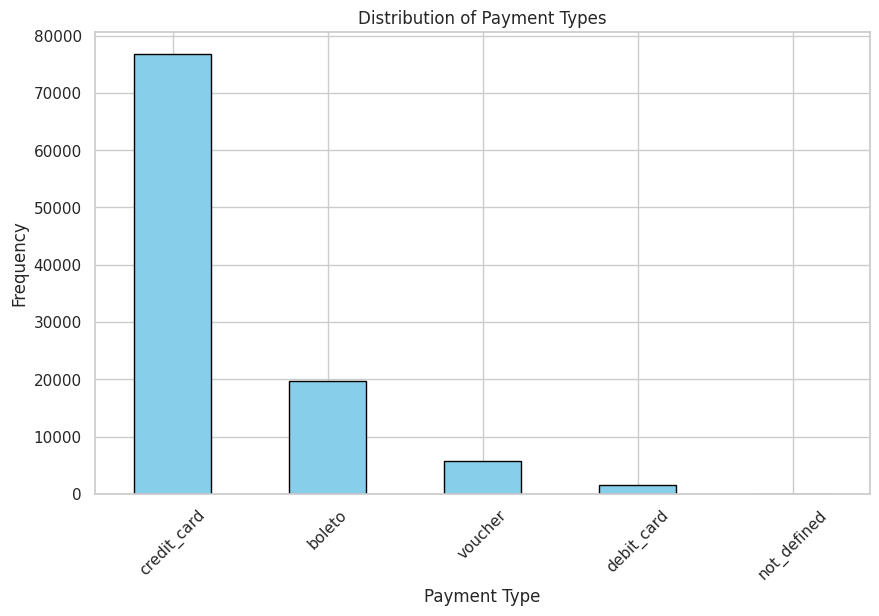

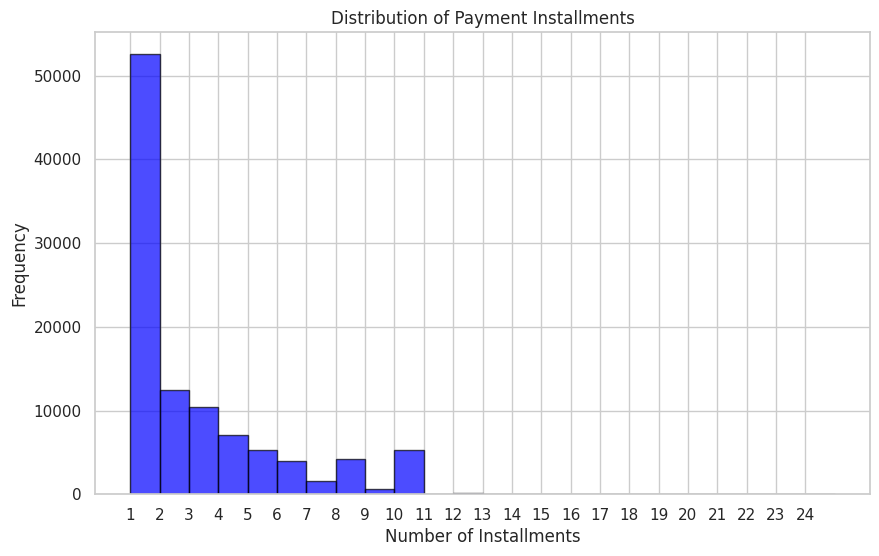

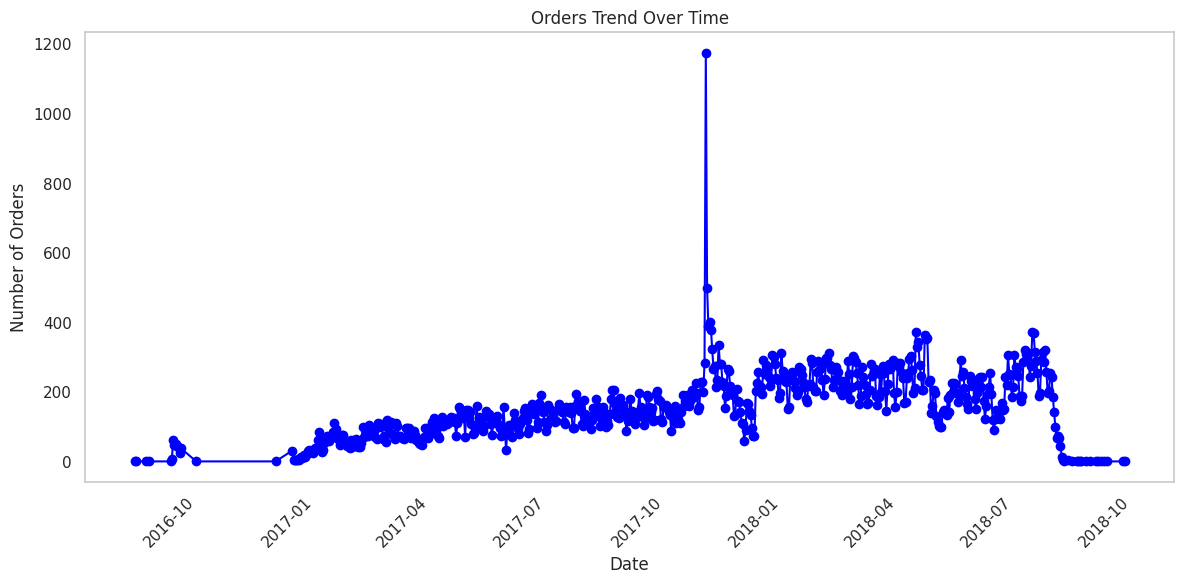

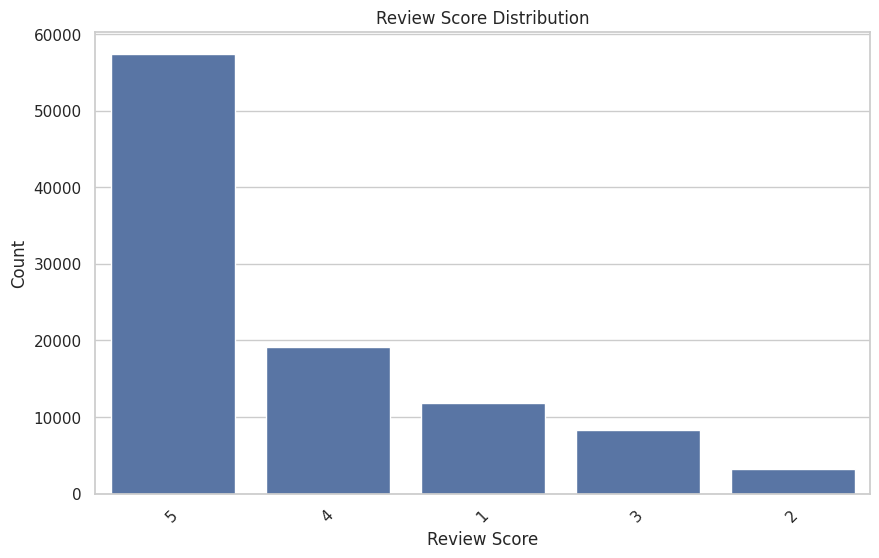

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

datasets_path = '/content/drive/MyDrive/olist_data'

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        if filename == 'olist_orders_dataset.csv':
            dataframes[filename]['order_purchase_timestamp'] = pd.to_datetime(dataframes[filename]['order_purchase_timestamp'])

            # Group by date and count the number of orders
            orders_trend = dataframes[filename].groupby(dataframes[filename]['order_purchase_timestamp'].dt.date).size()

            # Create a line chart
            plt.figure(figsize=(12, 6))
            plt.plot(orders_trend.index, orders_trend.values, marker='o', linestyle='-', color='blue')
            plt.title('Orders Trend Over Time')
            plt.xlabel('Date')
            plt.ylabel('Number of Orders')
            plt.xticks(rotation=45)
            plt.grid()
            plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
            plt.show()

            # # Plotting the Bar Chart
            # plt.figure(figsize=(10, 6))
            # sns.countplot(data=dataframes[filename], x='order_status', order=dataframes[filename]['order_status'].value_counts().index)
            # plt.title('Order Status Distribution')
            # plt.xlabel('Order Status')
            # plt.ylabel('Count')
            # plt.xticks(rotation=45)
            # plt.show()

        elif filename == 'olist_order_reviews_dataset.csv':
            plt.figure(figsize=(10, 6))
            sns.countplot(data=dataframes[filename], x='review_score', order=dataframes[filename]['review_score'].value_counts().index)
            plt.title('Review Score Distribution')
            plt.xlabel('Review Score')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

        elif filename == 'olist_order_payments_dataset.csv':

            payment_type_counts = dataframes[filename]['payment_type'].value_counts()

            plt.figure(figsize=(10, 6))
            payment_type_counts.plot.bar(color='skyblue', edgecolor='black')
            plt.title('Distribution of Payment Types')
            plt.xlabel('Payment Type')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45)
            plt.show()

           # distribution of payment installments
            plt.figure(figsize=(10, 6))
            plt.hist(dataframes[filename]['payment_installments'], bins=range(1, dataframes[filename]['payment_installments'].max() + 2), alpha=0.7, color='blue', edgecolor='black')
            plt.title('Distribution of Payment Installments')
            plt.xlabel('Number of Installments')
            plt.ylabel('Frequency')
            plt.xticks(range(1, dataframes[filename]['payment_installments'].max() + 1))
            plt.show()


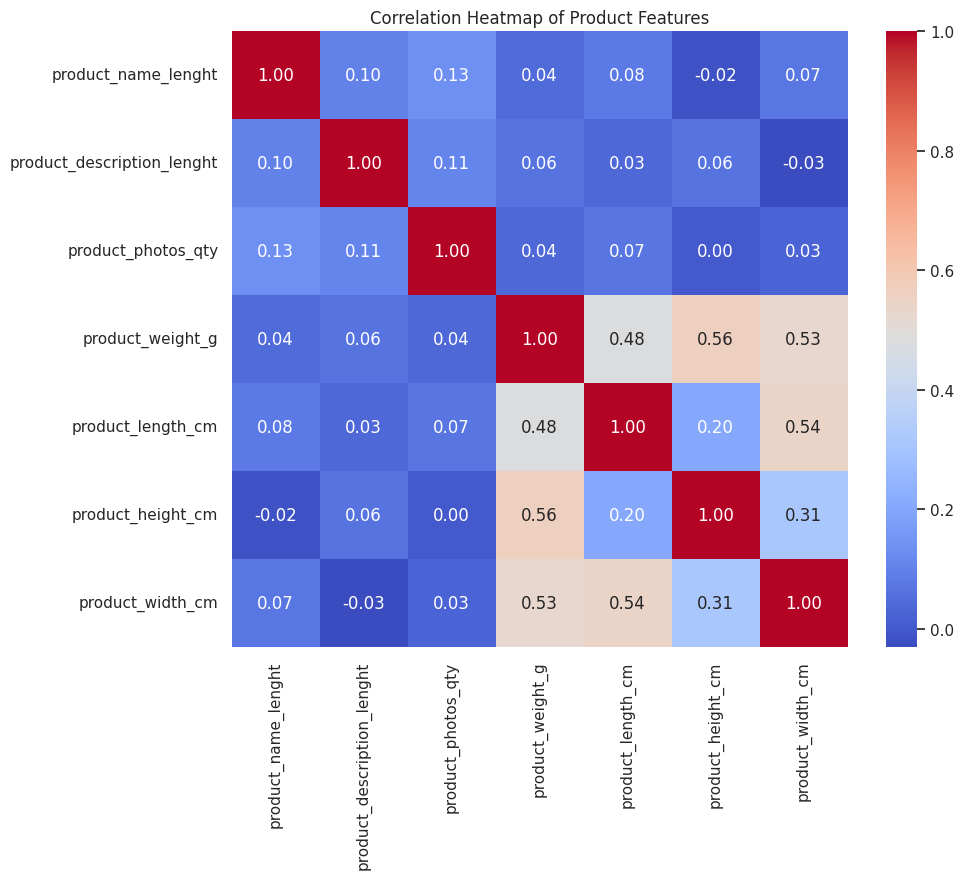

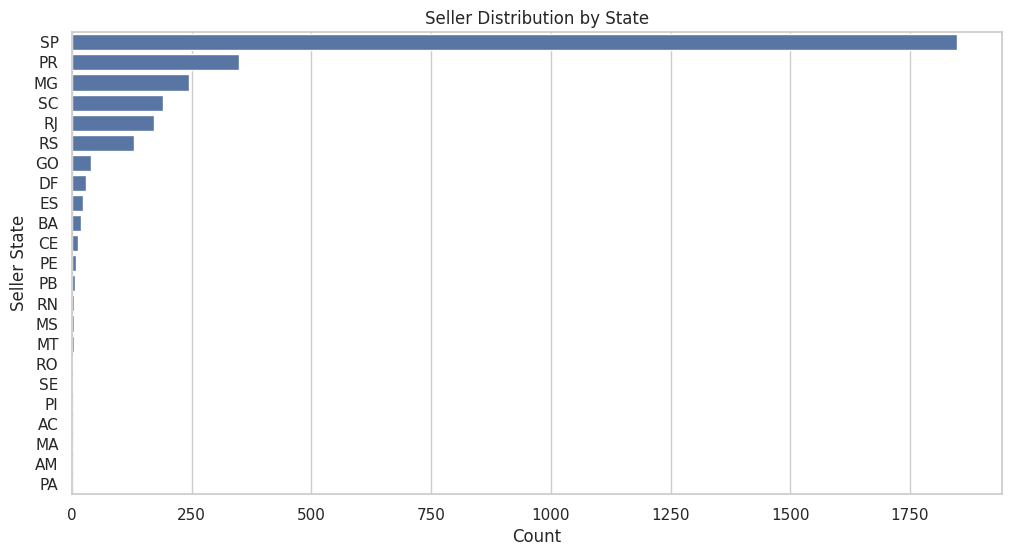

In [ ]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.axes_grid1 import make_axes_locatable


datasets_path = '/content/drive/MyDrive/olist_data'

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        if filename == 'olist_products_dataset.csv':
          numerical_df = dataframes[filename].select_dtypes(include=['number'])
          correlation_matrix = numerical_df.corr()
          plt.figure(figsize=(10, 8))
          sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
          plt.title('Correlation Heatmap of Product Features')
          plt.show()

        elif filename == 'olist_sellers_dataset.csv':
          plt.figure(figsize=(12, 6))
          sns.countplot(data=dataframes[filename], y='seller_state', order=dataframes[filename]['seller_state'].value_counts().index)
          plt.title('Seller Distribution by State')
          plt.xlabel('Count')
          plt.ylabel('Seller State')
          plt.show()


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

datasets_path = '/content/drive/MyDrive/olist_data'

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame, specifying the encoding
        # Try 'latin-1' or 'ISO-8859-1' if 'utf-8' doesn't work
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        # Check for missing values
        missing_values = df.isnull().sum().sum()
        if missing_values > 0:
            print(f'{filename} has {missing_values} missing values.')
        else:
            print(f'{filename} has no missing values.')

        # Summarize the data
        print(f'\nSummary of {filename}:')
        print(df.describe(include='all'))

        # Check for timestamp data type and convert if necessary
        for col in df.columns:
            if 'date' in col.lower() or 'time' in col.lower():
                try:
                    df[col] = pd.to_datetime(df[col])
                    print(f'Converted {col} to datetime in {filename}.')
                except Exception as e:
                    print(f'Failed to convert {col} in {filename}. Error: {e}')

        # Check for categorical data
        categorical_cols = df.select_dtypes(include='object').columns.tolist()
        if categorical_cols:
            print(f'Categorical columns in {filename}: {categorical_cols}')

        # Plotting distribution of numerical features
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


        # Check if feature scaling is needed
        if numerical_cols:
            for col in numerical_cols:
                min_val = df[col].min()
                max_val = df[col].max()
                print(f'{col} in {filename} has min: {min_val}, max: {max_val}')

        # Additional pre-processing steps
        # Dropping duplicates
        initial_shape = df.shape
        df.drop_duplicates(inplace=True)
        if df.shape != initial_shape:
            print(f'Dropped duplicates in {filename}.')

        # Checking for noise (e.g., negative values where not expected)
        for col in numerical_cols:
            if (df[col] < 0).any():
                print(f'Noise detected: Negative values in {col} of {filename}.')



olist_customers_dataset.csv has no missing values.

Summary of olist_customers_dataset.csv:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN          

<ipython-input-9-2ff39326c336>:36: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col])
<ipython-input-9-2ff39326c336>:36: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col])


Converted review_answer_timestamp to datetime in olist_order_reviews_dataset.csv.
Categorical columns in olist_order_reviews_dataset.csv: ['review_id', 'order_id', 'review_comment_title', 'review_comment_message']
review_score in olist_order_reviews_dataset.csv has min: 1, max: 5
olist_orders_dataset.csv has 4908 missing values.

Summary of olist_orders_dataset.csv:
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-